In [1]:
# Importación de bibliotecas que utilizaremos para el análisis
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

# 1. Información General

In [145]:
# Importamos el dataset
df_games = pd.read_csv('/datasets/games.csv')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [146]:
print(df_games.sample(20))

                                                    Name Platform  \
11883                                 Hearts of Iron III       PC   
14660                                 Megpoid the Music#      PSP   
6508   Dora the Explorer: The Search for Pirate Pig's...      GBA   
6312                             Disney's Chicken Little       GC   
16082                             Chameleon: To Dye For!       DS   
131                              Pokémon Emerald Version      GBA   
6557                                           Legendary     X360   
5567                                        Dead Space 2       PC   
7835                                    Puyo Puyo Sun 64      N64   
14880    Ookiku Furikabutte: Honto no Ace ni Nareru kamo       DS   
7010                              Colony Wars: Vengeance       PS   
11663                              Momotarou Dentetsu 11       GC   
11638  Dangerous Ji-San to 1000-nin no Otomodachi Yok...      3DS   
15843                             

# 2. Preparación de los datos

In [147]:
# Reemplazamos los nombres de las columnas a minusculas
columns = df_games.columns

columns_lower = [] 
for column in columns:
    column = column.lower()
    columns_lower.append(column)

df_games.columns = columns_lower
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [148]:
# Verificamos qué columnas del dataset df_games, tienen valores ausentes
print(df_games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [149]:
# Verificamos si el dataset df_games, tiene valores duplicados
print(df_games.duplicated().sum())

0


**Observaciones sobre el dataset df_games**

1. Observamos que el dataset tiene 11 columnas. 
2. La columna year_of_release, tiene un tipo de dato float que debería ser int
3. Al verificar si hay columnas con valores ausentes, observamos que las columnas name, year_of_release, critic_score, user_score y rating tienen valores ausentes.
4. Al verificar si hay registros duplicados en el dataframe, vimos que no hay datos duplicados.

Por lo que procedemos a realizar una limpieza a las columnas.

In [150]:
# Conversión de tipo de dato para la columna Year_of_release

# Primero verificaremos si hay valores ausentes

print(df_games['year_of_release'].isna().sum())

# Vemos que tiene valores ausentes. Los sustituiremos por cero (0)

df_games['year_of_release'] = df_games['year_of_release'].fillna(0)

print(df_games['year_of_release'].isna().sum())


# Cambiamos el tipo de dato float a int
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

print(df_games['year_of_release'].dtype)


269
0
int64


**Observaciones sobre la columna Year_of_release**

En el dataset df_games, la columna "year_of_release", tiene el tipo de dato float. Al ser el año de que se lanzó el juego, debe estar en formato entero. 

Antes de que lo pasaramos a entero, primero verificamos si había valores ausentes para no tener errores de casteo. Vimos que sí tenía 269 valores ausentes. Por lo que decidí sustituirlo por el valor cero. 

La razón por sustituirlo con el valor cero, fue para mantener la consistencia del tipo de dato (entero). Me habría gustado poner la cadena "Unknown" pero al momento de castearlo, iba a tener errores pues la cadena no se puede castear a entero. Por esta razón, el año desconocido, tiene el valor cero. 

Una de las razones de por qué hay valores ausentes en esta columna, es que al momento del registro del juego, no se tenían los datos sufucientes para hacerlo. Por lo que la base de datos, está mal construida. Permite valores null donde no debería. 

In [151]:
# Conversión de tipo de dato para la columna Critic_Score

# Verificamos si hay valores ausentes
print(df_games['critic_score'].isna().sum())

# Vemos que tiene 8578 valores ausentes. Los sustituiremos por la mediana para no sesgar los datos
df_games['critic_score'] = df_games['critic_score'].fillna(df_games['critic_score'].median())

print(df_games['critic_score'].isna().sum())

# Verificamos si el máximo es 100

print(df_games['critic_score'].max())


8578
0
98.0


In [152]:
print(df_games['critic_score'].sort_values().unique())

[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98.]


In [153]:
# Cambiamos el tipo de dato float a int
df_games['critic_score'] = df_games['critic_score'].astype(int)

print(df_games['critic_score'].dtype)

int64


**Observaciones sobre la columna Critic_score**

Observamos que la columna "critic_score", tiene tipo de dato float, por lo que no hay que hacerle modificación al tipo de dato, ya que es la puntuación de la crítica del juego. Sin embargo, al verificar los valores únicos, vemos que no hay punto flotante, por lo que no tiene caso dejarlo como tipo de dato float, lo cambiamos a entero.

Además, notamos que tenía 8,578 valores ausentes. Por lo que decidí sustituilos por la mediana para mantener la consistencia del tipo de dato y no sesgar los datos.



In [154]:
# Verificamos la columna User_score

print(df_games['user_score'].sort_values().unique())

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


In [155]:
# Verificamos si hay valores ausentes
print(df_games['user_score'].isna().sum())

6701


In [156]:
# Reemplzamos el valor 'tbd' por -2 
df_games['user_score'] = df_games['user_score'].replace('tbd', '-2')

print(df_games['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '-2' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [157]:
# Verificamos que el casteo y los valor por default estén bien aplicados

df_games['user_score'] = df_games['user_score'].fillna(df_games['user_score'].median())


# Cambiamos el tipo de dato string a float
df_games['user_score'] = df_games['user_score'].astype(float)

print(df_games['user_score'].dtype)

float64


In [158]:
print(df_games['user_score'].unique())

[ 8.   6.9  8.3  8.5  6.6  8.4  8.6  7.7  6.3  7.4  8.2  9.   7.9  8.1
  8.7  7.1  3.4  5.3  4.8  3.2  8.9  6.4  7.8  7.5  2.6  7.2  9.2  7.
  7.3  4.3  7.6  5.7  5.   9.1  6.5 -2.   8.8  9.4  6.8  6.1  6.7  5.4
  4.   4.9  4.5  9.3  6.2  4.2  6.   3.7  4.1  5.8  5.6  5.5  4.4  4.6
  5.9  3.9  3.1  2.9  5.2  3.3  4.7  5.1  3.5  2.5  1.9  3.   2.7  2.2
  2.   9.5  2.1  3.6  2.8  1.8  3.8  0.   1.6  9.6  2.4  1.7  1.1  0.3
  1.5  0.7  1.2  2.3  0.5  1.3  0.2  0.6  1.4  0.9  1.   9.7]


**Observaciones sobre la columna User_score**

1. Primero verificamos los valores únicos de la columna. Notamos que son valores que van de 0 a 10 con punto flotante, por lo que el tipo de dato, debería ser float. 
2. Observamos que hay valores ausentes, por lo que los sustituimos por la mediana, para no sesgar los datos.

3. El valor 'tbd' (to be determined), lo identificamos con el valor -2, por:

    a) Identificarlo rápidamente
    
    b) Mantener la consistencia del tipo de dato

El valor ausente del user_score, se debe que no se tenía el dato al momento del registro.

In [159]:
# Verificamos la columna Rating

print(df_games['rating'].sort_values().unique())

['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]


In [160]:
# Vemos que tiene 6766 valores ausentes. Los sustituiremos por Unknown
print(df_games['rating'].isna().sum())

df_games['rating'] = df_games['rating'].fillna('UNKNOWN')

print(df_games['rating'].isna().sum())


6766
0


In [161]:
print(df_games['rating'].sort_values().unique())

['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' 'UNKNOWN']


**Observaciones sobre la columna Rating**

1. Observamos que esta columna tiene el tipo de dato string. Por lo que no es necesario hacer el cambio de tipo de datos. 
2. Tenía 6,766 valores ausentes y los remplazamos por 'Unknown'. Puesto que bi sabemos de qué categoría sea el juego. 


# 2.1 Cálculo de las ventas totales de las regiones por juego

In [162]:
df_games['total_sales'] = df_games['na_sales'] + df_games['jp_sales'] + df_games['eu_sales'] + df_games['other_sales'] 

In [163]:
print(df_games.head(10))

                        name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0     41.36     28.96      3.77         8.45            76         8.0   
1     29.08      3.58      6.81         0.77            71 

# 3. Análisis de datos

In [164]:
# Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

games_per_year = df_games.groupby('year_of_release')['name'].count().reset_index(name='Num_games').sort_values('year_of_release')

print(games_per_year)

    year_of_release  Num_games
0                 0        269
1              1980          9
2              1981         46
3              1982         36
4              1983         17
5              1984         14
6              1985         14
7              1986         21
8              1987         16
9              1988         15
10             1989         17
11             1990         16
12             1991         41
13             1992         43
14             1993         60
15             1994        121
16             1995        219
17             1996        263
18             1997        289
19             1998        379
20             1999        338
21             2000        350
22             2001        482
23             2002        829
24             2003        775
25             2004        762
26             2005        939
27             2006       1006
28             2007       1197
29             2008       1427
30             2009       1426
31      

**Observaciones sobre número de juegos lanzados por año**

1. Observamos que la data va de los años 80's al 2016. 
2. De 1980 al 2011, fue incrementado el número de juegos lanzados. A partir del 2012, comienza a decaer alrededor del 50%. 
3. Los años con más juegos son 2008 y 2009 con 1,427 y 1,426 juegos lanzados respectivamente. 
4. El año con menos juegos fue el 1980, con 9 juegos lanzados.
5. El periodo con más juegos es de 2006 al 2011.
6. El periodo con incremento de juegos lanzados es de 1994 al 2016.


In [165]:
# Ventas por plataforma

sales_per_year = df_games[df_games['year_of_release'] != 0].groupby(['year_of_release','platform'])['total_sales'].sum().reset_index(name='total_sales_platform').sort_values('year_of_release')

print("Promedio de las ventas de las plataformas: ", sales_per_year['total_sales_platform'].mean())

sales_per_year = sales_per_year[sales_per_year['total_sales_platform'] >= 70]

print("Plataformas con ventas por arriba del promedio: ", sales_per_year['platform'].unique())



Promedio de las ventas de las plataformas:  37.0453361344538
Plataformas con ventas por arriba del promedio:  ['PS' 'PS2' 'GBA' 'DS' 'Wii' 'X360' 'PS3' 'PS4']


**Observaciones**

Necesitamos observar cómo varían las ventas de una plataforma a otra. Para ello, tenemos que elegir las plataformas con las mayores ventas y construir la distribución por año. 

Así que filtramos las plataformas con mayores ventas y para eso, elegimos aquellas plataformas que tienen ventas por arriba del promedio que son 37 millones de dólares. Sin embargo, el valor máximo son 211 millones, por lo que nos tomaremos un valor por arriba del promedio. Así que elegiremos las ventas por arriba de 70 millones de dólares.

<AxesSubplot:title={'center':'Plataformas con mayor venta por año'}, xlabel='Año de venta', ylabel='Venta en millones de dólares'>

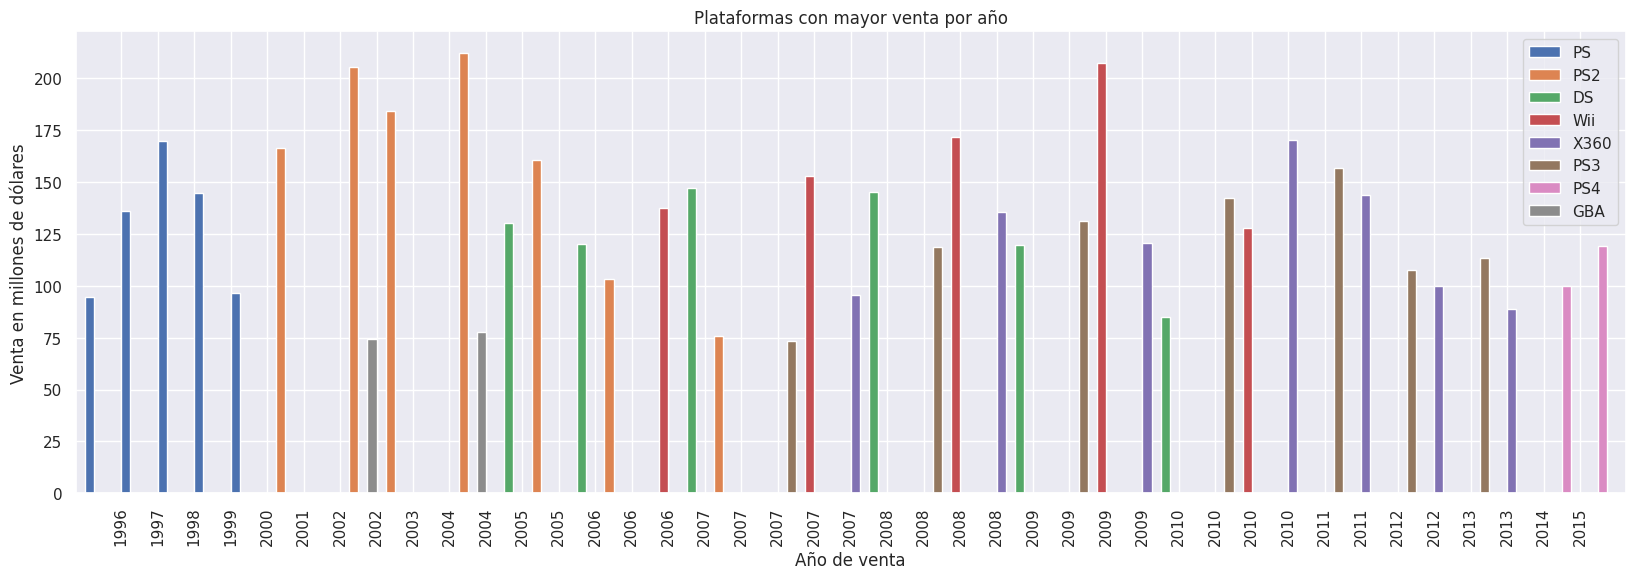

In [166]:
#Construimos la distribución por año con las plataformas con más ventas

platforms_best_sales = pd.DataFrame({'year_of_release': sales_per_year['year_of_release'],'PS': sales_per_year[sales_per_year['platform'] == 'PS']['total_sales_platform'],
'PS2': sales_per_year[sales_per_year['platform'] == 'PS2']['total_sales_platform'],
'DS': sales_per_year[sales_per_year['platform'] == 'DS']['total_sales_platform'],
'Wii': sales_per_year[sales_per_year['platform'] == 'Wii']['total_sales_platform'],
'X360': sales_per_year[sales_per_year['platform'] == 'X360']['total_sales_platform'],
'PS3': sales_per_year[sales_per_year['platform'] == 'PS3']['total_sales_platform'],
'PS4': sales_per_year[sales_per_year['platform'] == 'PS4']['total_sales_platform'],
'GBA': sales_per_year[sales_per_year['platform'] == 'GBA']['total_sales_platform']})


platforms_best_sales = platforms_best_sales.fillna(0)


platforms_best_sales.plot(x='year_of_release', kind='bar', xlabel='Año de venta', ylabel = 'Venta en millones de dólares',
                         title = 'Plataformas con mayor venta por año', figsize=[20,6], width = 2)

**Observaciones sobre las plataformas con mayores ventas por año**

1. Observamos que la venta de plataformas por arriba del promedio, son a partir del año 1995 al 2016. 
2. Podemos apreciar que la plataforma PS, tiene 5 años de venta siendo el 1997, la mayor con una venta cerca de 174 millones de dólares. 
3. Aparentemente, la plataforma con más años de venta, es PS2 con ventas desde el 2000 al 200. Siendo el 2004 el año con mayor venta, pasando los 200 millones de dólares. 
4. El Wii, tiene presencia desdel el 2006 al 2010, con una venta en aumento por año. Sin embargo, a partir del 2011, ya no percibimos ventas. 
5. Después tenemos X360, con ventas a partir del 2007 al 2013. Siendo el 2010, el año con más ventas. 
6. El DS, vemos que tiene ventas por arriba del promedio. Teniendo presencia desde el 2004 al 2009. Siendo el 2006, el año con más ventas. Sin embargo, no hay mucha diferencia vs los otros años. A partir del 2008, comienza a bajar las ventas. 
7. Tenemos el PS3, com presencia desde el 2007 al 2013. Con aumento año tras año, siendo el 2011 el año con mayor venta. 
8. El PS4, tiene ventas a partir del 2015, siendo el 2016 con mayor venta. 
9. El GBA, tiene presencia desde el 202 al 2004. Sin embargo, en el 2003, no hay ventas por arriba del promedio.

Con lo anterior, podemos observar que el PS, era muy popular en el año 1997, con mayores ventas. Sin embargo, para el año 2000, ya no figuraba en las ventas. 

Con esto, podemos ver que cada cierto periodo, las plataformas dejan de ser populares o bien, no hay juegos intreresantes para cierto año o simplemente, dejan de existir. Así que veamos, cuánto tiempo tiene que pasar para que una plataforma deje de existir y otra nazca. 

Por lo que observamos en la gráfica, es que:
* PS: 1999 - 1995 = 5 años
* PS2: 2007 - 2000 = 7 años
* DS: 2009 - 2004  = 6 años
* Wii: 2010 - 2006 = 5 años
* X360: 2013 - 2007 = 7 años
* PS3: 2013 - 2007 = 7 años
* PS4: 2016-2015 = 2 años
* GBA: 2004 - 2022 = 3 años

Avg_life_platform_sesgo = (5+7+6+5+7+7+2+3) / 6 = 5.25


Podemos decir que en promedio de que una plataforma deja de existir y nace otra, cada 5.25 años


**Conclusión**
1. Las plataformas que tiene mayores ventas por aarriba del promedio son:
    * PS
    * PS2
    * DS
    * Wii
    * X360
    * PS3
    * PS4
    * GBA


Por lo que, la consola con mayor presencia, ha sido el Play Station en sus diferentes versiones. 

2. El top 3 de plataformas con mayor venta son: 
    1. PS2, por encima de 200 millones de dólares, 
    2. Wii con ventas alrededor de 190 millones de dólares. 
    3. X360 con alrededor de 176 millones de dólares.

3. Las plataformas, suelen tener un promedio de vida de 5.25 años. Siendo los años 3 y 4, los años con incremento de ventas. Pasados estos años, comienza a decrecer la venta.


Por todo lo anterior, el periodo con mayor significancia para los datos, es del 1994 al 2016. Por lo tanto, este periodo lo tomaremos para hacer la estimación para el 2017. 



In [167]:
data_sales_plataform = df_games[df_games['year_of_release'] >= 1994]

print(data_sales_plataform.head(10))

                           name platform  year_of_release         genre  \
0                    Wii Sports      Wii             2006        Sports   
2                Mario Kart Wii      Wii             2008        Racing   
3             Wii Sports Resort      Wii             2009        Sports   
4      Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
6         New Super Mario Bros.       DS             2006      Platform   
7                      Wii Play      Wii             2006          Misc   
8     New Super Mario Bros. Wii      Wii             2009      Platform   
10                   Nintendogs       DS             2005    Simulation   
11                Mario Kart DS       DS             2005        Racing   
12  Pokemon Gold/Pokemon Silver       GB             1999  Role-Playing   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0      41.36     28.96      3.77         8.45            76         8.0   
2      15.68     12.76  

In [168]:
platform_lead_sales = data_sales_plataform.groupby(['platform'])['total_sales'].sum().reset_index(name='Sales').sort_values(['Sales'], ascending=False)
print("El top 5 de las plataformas con mayores ventas son: \n",platform_lead_sales.head(10))


El top 5 de las plataformas con mayores ventas son: 
    platform    Sales
14      PS2  1233.56
26     X360   961.24
15      PS3   931.34
24      Wii   891.18
3        DS   802.76
13       PS   727.58
16      PS4   314.14
5       GBA   312.88
17      PSP   289.53
1       3DS   257.81


**Observaciones sobre las plataformas líderes en venta**

La data que nos tómamos fue del 1994 al 2016. Sin importar la venta anual. Por lo que si hacemos el análisis de qué plataforma tiene mayor ventas del periodo 1004 al 2016 tenemos que:

1. El top 3 es:
    1. PS2 con una venta de 1,233 millones de dólares 
    2. X360 con una venta de 961 millones de dólares
    3. PS3 con una venta de 931 millones de dólares
2. Dentro del top 10:
    4. Wii con una venta de 891.18 millones de dólares
    5. DS con una venta de 802.76 millones de dólares
    6. PS con 727.58 millones de dólares
    7. PS4 con 314.14 mnillones de dólares
    8. GBA con 312.88 millones de dólares
    9. PSP con 289.53 millones de dólares
    10. 3DS con 257.81 millones de dólares

In [169]:
print("El top 10 de las plataformas con menor venta son: \n",platform_lead_sales[platform_lead_sales['Sales'] > 1].tail(10))

El top 10 de las plataformas con menor venta son: 
    platform   Sales
28     XOne  159.32
4        GB  152.08
21     SNES   84.67
25     WiiU   82.19
18      PSV   53.81
19      SAT   33.59
2        DC   15.95
7       GEN    8.13
23       WS    1.42
10       NG    1.23


**Observaciones sobre las plataformas que van en decadencia**

Observamos que estas plataformas tiene menos ventas.

1. NG con 1.23 millones de dólares
2. WS con 1.42 millones de dólares
3. GEN con 8.13 millones de dólares
4. DC con 15.95 millones de dólares
5. SAT con 33.59 millones 
6. PSV con 53.81 millones
7. WiiU 82.19 millones
8. SNES con 84.67 millones
9. GB con 152 millones de dólares
10. XOne con 159 millones de dólares


In [170]:
platform_lead_sales = data_sales_plataform.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index(name='Sales').sort_values(['Sales', 'year_of_release'], ascending=False)
print("El top 10 de las plataformas con mayores ventas por año son: \n",platform_lead_sales.head(10))

platform_lead_sales = data_sales_plataform.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index(name='Sales').sort_values(['Sales'], ascending=False)
print("El top 10 de las plataformas con menores ventas por año son: \n",platform_lead_sales[platform_lead_sales['Sales'] > 1].tail(10))

El top 10 de las plataformas con mayores ventas por año son: 
      year_of_release platform   Sales
84              2004      PS2  211.81
130             2009      Wii  206.97
72              2002      PS2  205.38
78              2003      PS2  184.31
122             2008      Wii  171.32
138             2010     X360  170.03
36              1998       PS  169.49
63              2001      PS2  166.43
91              2005      PS2  160.66
143             2011      PS3  156.78
El top 10 de las plataformas con menores ventas por año son: 
      year_of_release platform  Sales
32              1998       DC   3.38
35              1998       PC   3.26
60              2001      N64   3.25
162             2013      PSP   3.14
98              2006       PC   2.85
77              2003       PS   2.07
158             2013       DS   1.54
195             2016     X360   1.52
184             2015      Wii   1.14
56              2001       DC   1.07


**Observaciones**

El top 5 de las plataformas que tienen mejores ventas y que persisten con los años.
1. PS2 (2004, 2002, 2003, 2001, 2005) 
2. Wii (2009, 2008)
3. X360 (2010)
4. PS (1998)
5. PS3 (2011)

El top 7 de las plataformas con menos ventas por año:
1. DC (2001, 1998)
2. PC (2006, 1998)
3. PS (2003)
4. PSP (2013)
5. N64 (2001)
6. Wii (2005)
7. X360 (2016)

**Conclusiones sobre plataformas líderes en ventas**

1. Las 5  plataformas con mayores ventas son PS2, X360, PS3, WII y DS. Sin embargo, cuando hacemos el análisis sobre los años de persistencia en el mercado, notamos que:
    1.1 PS2, tiene 5 años del 2001 al 2005 con las mejores ventas
    1.2 Wii con 2 años con mejores ventas 2008- 2009
    1.3 X360 con un año, 2010
    1.4 PS3 el 2011
    1.5 PS, el 1998
Ordenando los años desde el más reciente, tenemos que:
   1. PS3
   2. X360
   3. Wii
   4. PS2
   5. PS

Por lo anterior y la gráfica de barras de arriba, podemos decir que las plataformas potencialmente rentables son:
1. PS2
2. PS3
3. X360
4. Wii

Vemos que los PSx, son de los más populares desde los años 90s, por lo que aunque no aparezca en nuetro análisis por año, el PS4 que tiene presencia desde el 2014, aún no llega a su auge. Así que el 2017 o 2018, de acuerdo a lo observado en la gráfica de barras, es que en estos años, tenga una buena venta que puede pertenecer al top 10.


Text(0, 0.5, 'Ventas en millones de dólares')

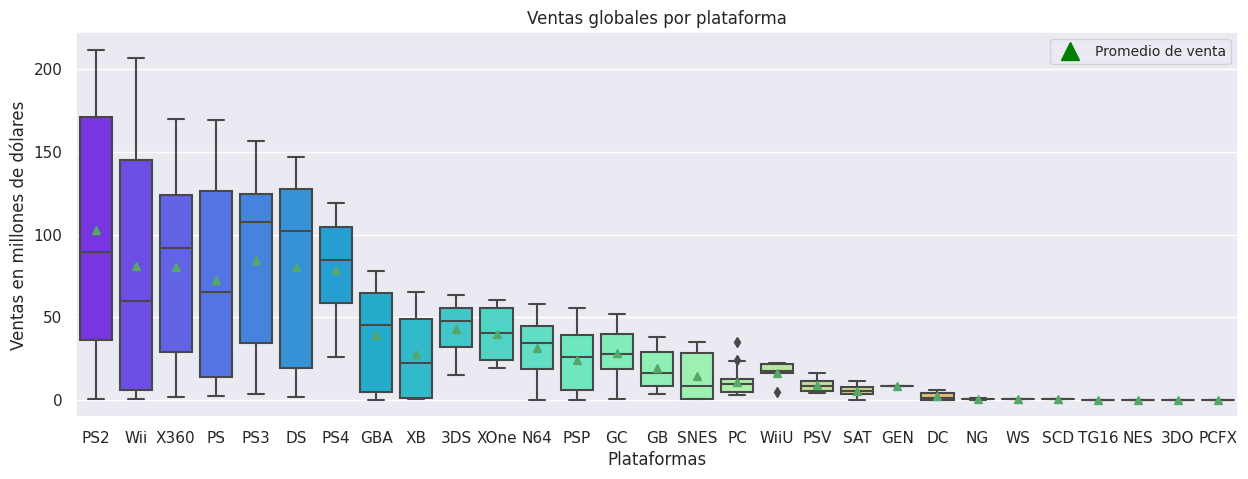

In [172]:
from matplotlib.lines import Line2D  

global_sales_platform = platform_lead_sales

sns.boxplot(y = global_sales_platform['Sales'],
            x = global_sales_platform['platform'], palette='rainbow', showmeans=True)

width = 15
height = 5
sns.set(rc = {'figure.figsize':(width, height)})
green_triangle = Line2D([], [], color='green', marker='^', linestyle='None', markersize = 13, label='Promedio de venta')
plt.legend(handles = [green_triangle], loc = "upper right", ncol = 1, fontsize = 10)
plt.title('Ventas globales por plataforma')
plt.xlabel('Plataformas')
plt.ylabel('Ventas en millones de dólares')

<AxesSubplot:xlabel='platform', ylabel='Sales'>

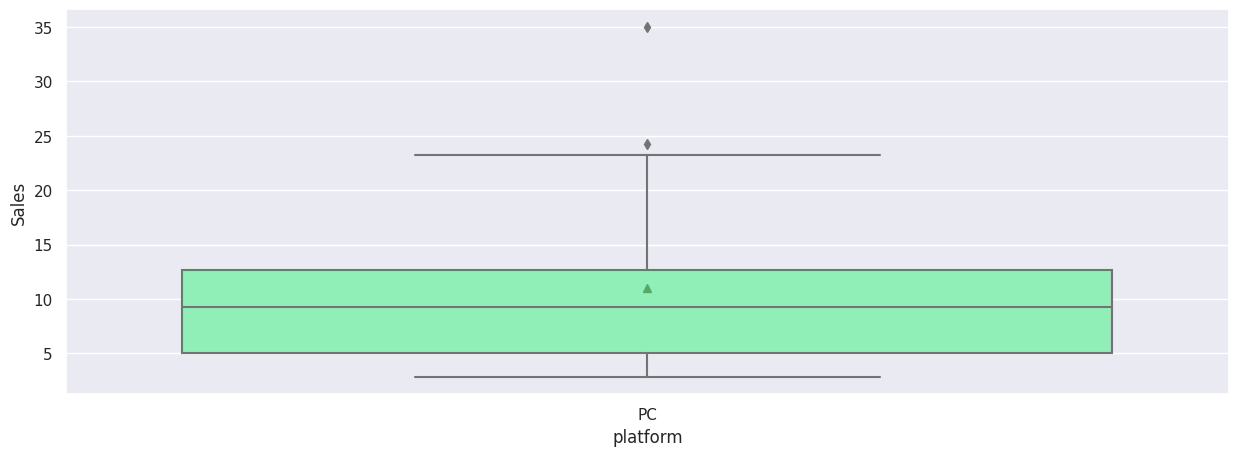

In [173]:
pc_global_sales = global_sales_platform[global_sales_platform['platform']=='PC']

sns.boxplot(y = pc_global_sales['Sales'],
            x = pc_global_sales['platform'], palette='rainbow', showmeans=True)



<AxesSubplot:xlabel='platform', ylabel='Sales'>

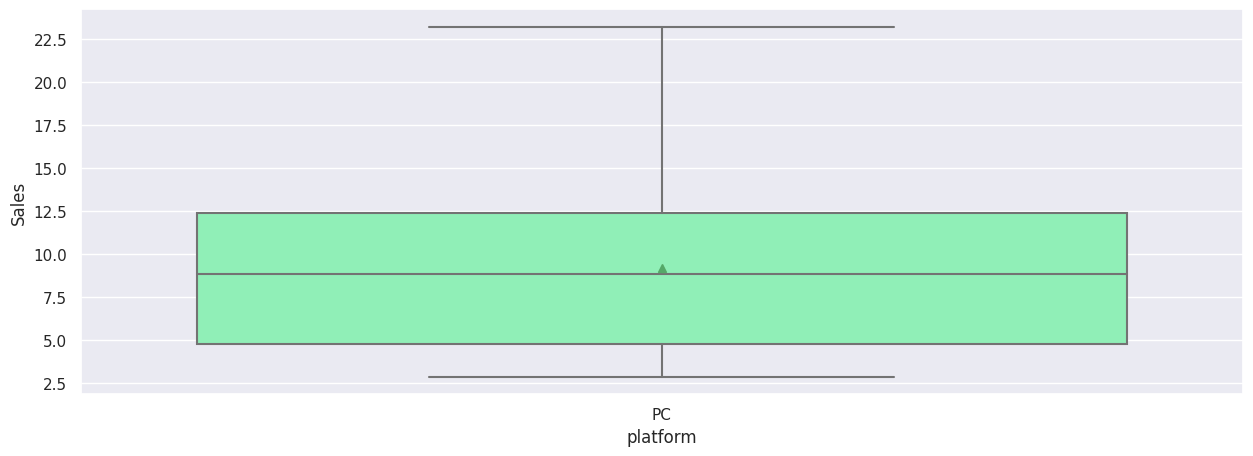

In [174]:
# Quitamos valores atípicos en PC
global_sales_platform.drop(global_sales_platform[(global_sales_platform['platform'] =='PC') & (global_sales_platform['Sales'] >=24.28)].index, inplace=True)



pc_global_sales = global_sales_platform[global_sales_platform['platform']=='PC']

sns.boxplot(y = pc_global_sales['Sales'],
            x = pc_global_sales['platform'], palette='rainbow', showmeans=True)



**Observaciones sobre las ventas globales por plataforma**

En la gráfica de cajas de las plataformas, observamos que las ventas de las plataformas PS2, Wii, X360, PS, PS3, DS y PS4, el promedio de ventas está alrededor de los 75 millones de dólares. Mientas que a partir de GBA a PCFX, las ventas promedio descienden drásticamente.

Podemos concluir con las plataformas líderes en ventas y con la gráfica de cajas de las ventas globales por plataforma que, las plataformas PS2, Wii, X360, PS, PS3, DS y PS4 son las plataformas rentables donde su venta promedio está por encima de los 75 millones de dólares. 

Por otro lado, las otras platformas tienen ventas importantes pero su venta promedio está por debajo de 50 millones de dólares por lo que ya no las hacen tan rentables. Ya sea por:
1. La plataforma dejó de existir
2. Las plataformas populares se comieron el mercado
3. Los juegos no son tan buenos

Veamos cómo afecta la crítica de los usuarios a la venta de los juegos. Nos tómaremos 2 plataformas de los líderes: PS3 y Wii para observar las ventas vs las críticas. 

Primero, graficaremos una gráfica de dispersión para observar la distribución de las críticas vs las ventas y después verificaremos la relación con la correlación de la variable 'critic_score' vs 'total_sales'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Ventas de PS3 de acuerdo a las reseñas de los usuarios'}, xlabel='Calificación de la reseña', ylabel='Ventas'>

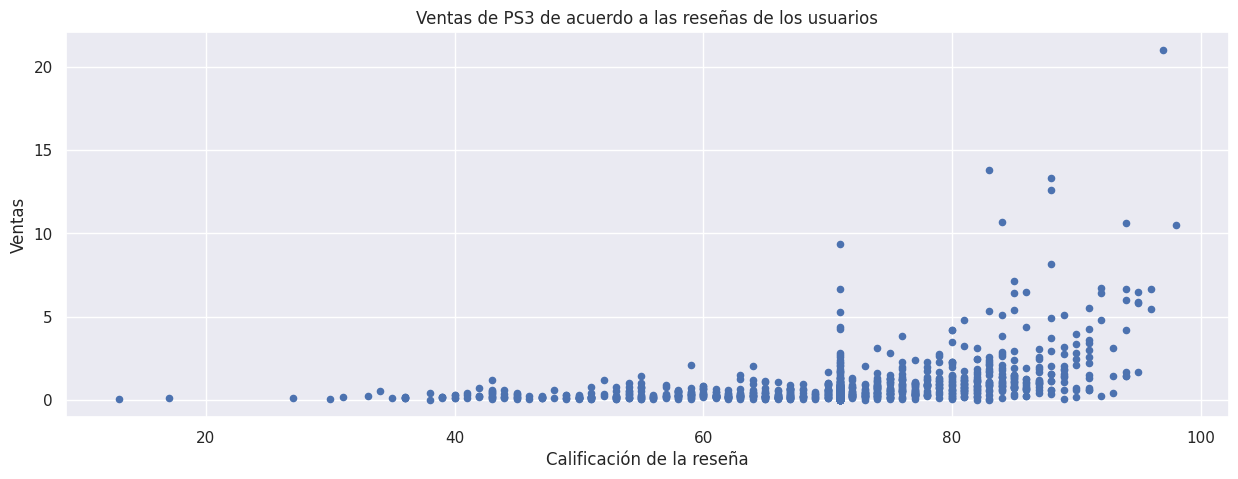

In [175]:
# Gráfica de dispersión para la plataforma PS3 
ps3_sales_score = data_sales_plataform[data_sales_plataform['platform'] == 'PS3'][['critic_score', 'total_sales']]

ps3_sales_score.plot(x='critic_score', y='total_sales', kind='scatter', 
                     title='Ventas de PS3 de acuerdo a las reseñas de los usuarios',
                    ylabel = 'Ventas',
                    xlabel = 'Calificación de la reseña')



In [176]:
# Función de correlación de 'critic_score' y 'total_sales'
print("La correlación entre las ventas y la reseña de los usuarios de PS3 es: ", ps3_sales_score['total_sales'].corr(ps3_sales_score['critic_score']))

La correlación entre las ventas y la reseña de los usuarios de PS3 es:  0.3986608611186783


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Ventas de Wii de acuerdo a las reseñas de los usuarios'}, xlabel='Calificación de la reseña', ylabel='Ventas'>

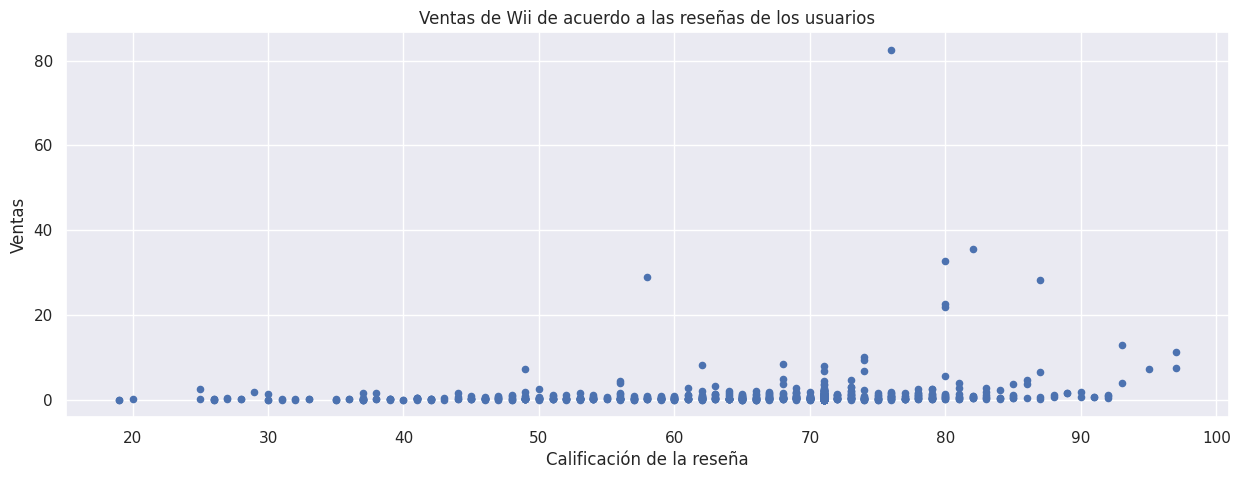

In [177]:
# Gráfica de dispersión para la plataforma Wii
wii_sales_score = data_sales_plataform[data_sales_plataform['platform'] == 'Wii'][['critic_score', 'total_sales']]

wii_sales_score.plot(x='critic_score', y='total_sales', kind='scatter', 
                     title='Ventas de Wii de acuerdo a las reseñas de los usuarios',
                    ylabel = 'Ventas',
                    xlabel = 'Calificación de la reseña')

In [178]:
# Función de correlación del Wii de 'critic_score' vs 'total_sales'
print("La correlación entre las ventas y la reseña de los usuarios es: ", wii_sales_score['total_sales'].corr(wii_sales_score['critic_score']))

La correlación entre las ventas y la reseña de los usuarios es:  0.10650147082384774


**Observaciones sobre la relación de la crítica de los usuarios y ventas**

Observamos en la gráfica de dispersión de la plataforma PS3, que puntuación de la crítica conforme se va acercando a 100 puntos, las ventas aumentan. Sin embargo, al corroborar la información con la función de correlación, esta función nos regresa el valor de 0.35, por lo que es una relación positiva pero no es una relación fuerte. 

Por otro lado, hicimos otro experimento con la plataforma Wii y los resultamos son similares. Conforme la puntuación de la crítica se acerca a 100, las ventas aumentan. Sin embargo, esta plataforma, tiene una densidad casi uniforme, donde el aumento de ventas se ve atípico. Verificando la correlación de las ventas vs la crítica, tenemos un resultado de 0.18, por lo que también tenemos una relación positiva pero no fuerte. 

Por lo tanto, la crítica de los usuarios y profesionales afecta a la venta de los juegos de la plataforma pero no es una variable relevante.

In [179]:

# Función para filtrar videojuegos que tienen más de una plataforma y sus ventas
def filtrar_videojuegos_con_multiple_plataforma_y_ventas(df):
    # Creamos un diccionario para almacenar las plataformas y ventas por cada videojuego
    plataformas_por_juego = {}
    
    # Iteramos sobre cada fila del dataframe
    for _, row in df.iterrows():
        juego = row['name']
        plataforma = row['platform']
        venta = row['total_sales']
        
        # Si el videojuego ya tiene plataformas asignadas, las añadimos
        if juego in plataformas_por_juego:
            plataformas_por_juego[juego].append((plataforma, venta))
        else:
            # Si no tiene, creamos una lista con la primera plataforma y su venta
            plataformas_por_juego[juego] = [(plataforma, venta)]
    
    # Filtrar solo aquellos juegos que tienen más de una plataforma
    juegos_con_multiple_plataforma = {juego: plataformas for juego, plataformas in plataformas_por_juego.items() if len(plataformas) > 1}
    
    # Convertimos el diccionario filtrado en un dataframe
    result_data = []
    for juego, plataformas in juegos_con_multiple_plataforma.items():
        for plataforma, venta in plataformas:
            result_data.append([juego, plataforma, venta])
    
    result_df = pd.DataFrame(result_data, columns=['name', 'platform', 'total_sales'])
    return result_df


def agrupar_por_nombre(df):
    # Agrupar por 'name' y pivotar para que cada nombre de juego sea una columna
    df_pivot = df.pivot_table(index='platform', columns='name', values='total_sales', aggfunc='sum')
    
    # Resetear el índice para tener la columna 'platform' de nuevo
    df_pivot.reset_index(inplace=True)
    
    return df_pivot



# Crear el dataframe
game_vs_platforms = filtrar_videojuegos_con_multiple_plataforma_y_ventas(data_sales_plataform[0:1000])
game_platform = agrupar_por_nombre(game_vs_platforms).iloc[0:, 0:20]


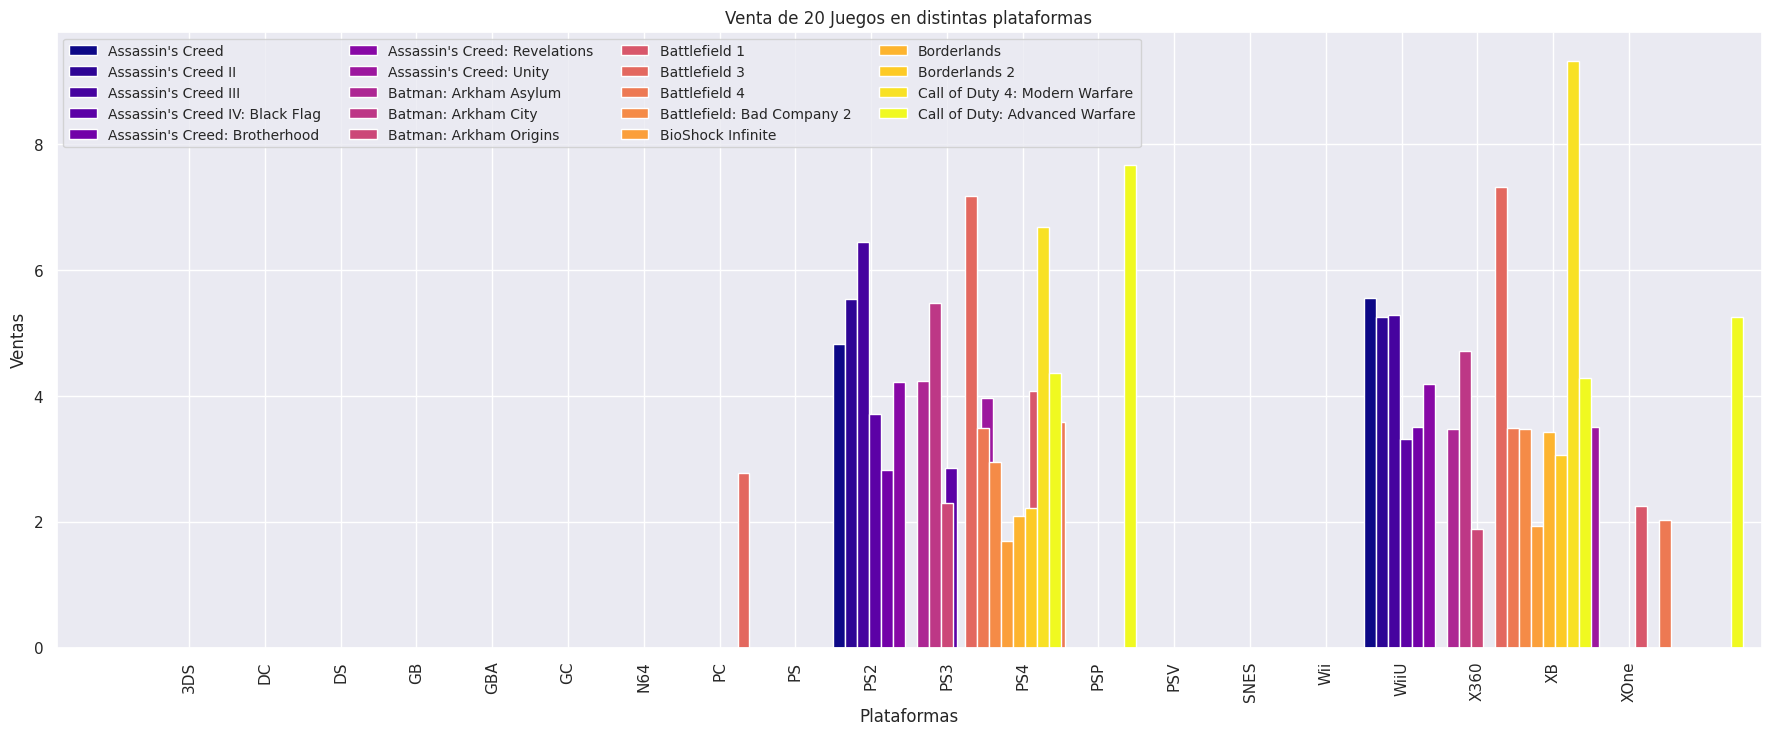

In [180]:

game_platform.plot(x='platform', kind='bar', width = 3, figsize=[22,8], cmap='plasma', 
                   title='Venta de 20 Juegos en distintas plataformas', xlabel = 'Plataformas', ylabel = 'Ventas')
plt.legend(loc = "upper left", ncol = 4, fontsize = 10)



**Observaciones sobre la venta de juegos en distintas plataformas**

Observamos que los los juegos son más populares en unas plataformas que en otras. Por ejemplo, el Assassin's creed II, tuvo más ventas en PS2 que en WiiU al igual que el Assassin's creed III. 
Batman:Arkham city es más popular en PS4 que en XB. 

Por otro lado, tenemos que el Call of duty 4: Modern warfare, tiene más ventas en XB que en PS4. 
Sin embargo, a grandes rasgos, podemos comprobar visualmente que los juegos con mayor ventas, tienen mayor popularidad en los PSx que en otras plataformas. 


<AxesSubplot:title={'center':'Venta de videojuegos por género'}, xlabel='Género del juego', ylabel='Ventas en millones de dólares'>

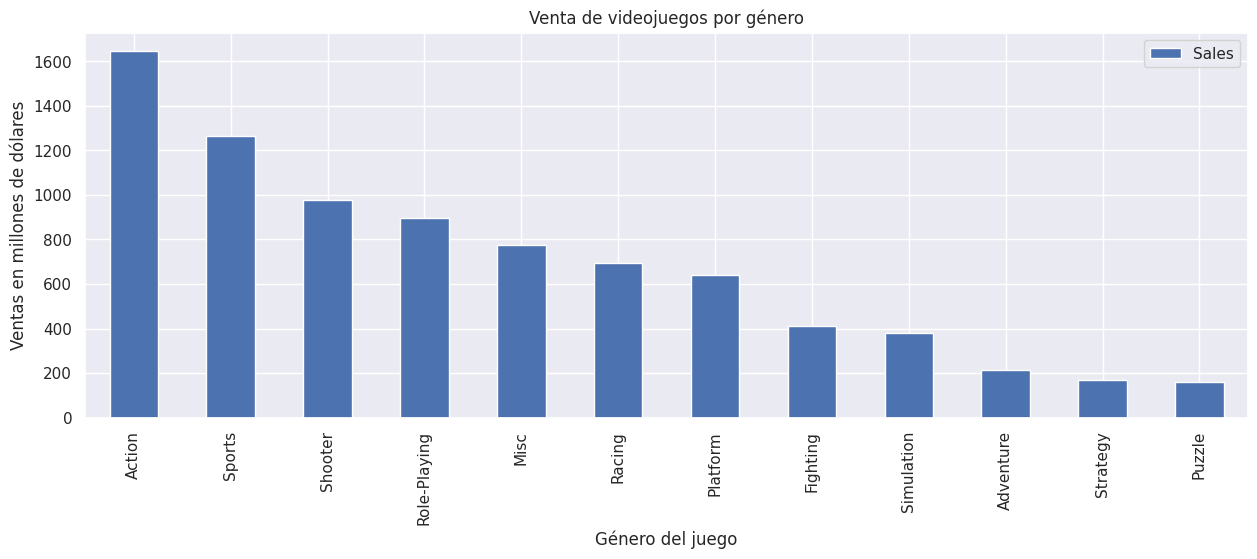

In [181]:
sales_per_genre = data_sales_plataform.groupby('genre')['total_sales'].sum().reset_index(name='Sales').sort_values('Sales', ascending=False)
sales_per_genre.plot(x='genre', kind='bar', title='Venta de videojuegos por género', 
                    xlabel = 'Género del juego',
                    ylabel = 'Ventas en millones de dólares')

**Observaciones sobre la venta de videojuegos por género**

Observamos que el género de juegos con mayor venta, es la de acción seguido de Sport y Shooter con ventas alrededor de 1,600, 1,300 y 1000 millones de dólares respectivamente.

Por otro lado, los que tienen menos venta son los géneros, Puzzle, strategy y Adventure con una venta menos de los 200 millones de dólares.


# Conclusiones del análisis de datos

1. Análizamos el lanzamiento de los videojuegos por año y observamos que a partir de 1980 al 2011, cada año había un incremento de lanzamientos de juegos. A partir del 2012, comenzó un decremento de alrededor del 50%.
2. El periodo de años con más juego lanzados, fue del 2006 al 2011. Los años con más lanzamiento de juegos fueron el 2008 y 2009.
3. También, pudimos observar que periodo con mayor significancia en la venta de juegos, es de 1994 al 2016, para fines de nuestro estudio. 
4.  Posteriormente, observamos las ventas totales por plataformas para determinar cuáles son las plataformas que solían ser populares y actualmente ya no lo son, además de observar cuánto tiempo tiene que pasar para que una plataforma aparezca y las viejas desaperezcan.  Pudimos observar que la venta promedio de las ventas totales era bajo, de 37 millones de dólares pero las ventas están muy dispersas pues la mayor venta es alrededor de 200 millones de dólares. Para fines del estudio y observación, tomé las ventas que fueran el doble por arriba del promedio, es decir, 70 millones de dólares y así poder rescatar las plataformas líderes, cuáles son las viejas y cuáles son las nuevas. Lo que obtuvimos fue lo siguiente:

    4.1 Observamos que la venta de plataformas por arriba del promedio, son a partir del año 1995 al 2016. 

    4.2 Pudimos apreciar que la plataforma PS, tiene 5 años de venta siendo el 1997, la mayor con una venta cerca de 174 millones de dólares. 

    4.3 Aparentemente, la plataforma con más años de venta, es PS2 con ventas desde el 2000 al 2007. Siendo el 2004 el año con mayor venta, pasando los 200 millones de dólares. 

    4.4 El Wii, tiene presencia desdel el 2006 al 2010, con una venta en aumento por año. Sin embargo, a partir del 2011, ya no percibimos ventas. 

    4.5 Después tenemos X360, con ventas a partir del 2007 al 2013. Siendo el 2010, el año con más ventas. 

    4.6 El DS, vemos que tiene ventas por arriba del promedio. Teniendo presencia desde el 2004 al 2009. Siendo el 2006, el año con más ventas. Sin embargo, no hay mucha diferencia vs los otros años. A partir del 2008, comienza a bajar las ventas. 

    4.7 Tenemos el PS3, com presencia desde el 2007 al 2013. Con aumento año tras año, siendo el 2011 el año con mayor venta. 

    4.8 El PS4, tiene ventas a partir del 2015, siendo el 2016 con mayor venta. 

    4.9 El GBA, tiene presencia desde el 202 al 2004. Sin embargo, en el 2003, no hay ventas por arriba del promedio.

Con lo anterior, podemos observar que el PS, era muy popular en el año 1997, con mayores ventas. Sin embargo, para el año 2000, ya no figuraba en las ventas. 

Con esto, podemos ver que cada cierto periodo, las plataformas dejan de ser populares o bien, no hay juegos intreresantes para cierto año o simplemente, dejan de existir. Por lo que después analizamos el tiempo que tarda una plataforma en tener auge y después desaparecer. Así que nos tomámos los periodos de venta de cada plataforma y sacamos el promedio. Pudimos observar que una plataforma deja de existir y nace otra, cada 5.25 años. Siendo los años 3 y 4, los años con incremento de ventas. Pasados estos años, comienza a decrecer la venta.

Por lo que:

1. Las plataformas que tiene mayores ventas y más populares son:
    * PS
    * PS2
    * DS
    * Wii
    * X360
    * PS3
    * PS4
    * GBA


Siendo el Play Station en sus diferentes versiones, la plataforma con mayor presencia en las ventas. 

Las plataformas que tenían ventas por arriba del promedio pero dejaron de existir fueron:

	* 3DS
	* XOne
	* N64
	* PSP
	* GC

5. Por lo que nos preguntamos si  las reseñas de los usuarios y profesionales afectan la venta de los juegos de las plataformas. Para hacer el análisis por correlación y gráficva de dispersión. Nos tomamos el PS3 y Wii que son platformas que tuvieron ventas por arriba del promedio pero hubo años que decrementó su venta y estos fueron los resultados:

	5.1 La gráfica de dispersión del PS3, parecer tener una correlación positiva fuerte pues conforme tenemos calificaciónes cerca de 100, la venta aumenta. Sin embargo, al verificar las variables 'critic_score' (calificación de la crítica) vs las ventas, obtevimos una relación posotiva pero no fuerte (0.35).
    
	5.2 Por otro lado, la gráfica de dispersión de Wii, observamos que la calificación no importa, ya que las ventas altas parecen ser atípicas. La función de correlación, nos dio 0.18. También tenemos uns relación positiva pero no fuerte. 

	Por lo que podemos decir que la calificación de los usuarios y los profesionales, si afecta a la venta pero no es un factor muy importante. 

6. Revisamos la venta de los videojuegos en distintas plataformas y pudimos observar que, hay plataformas favoritas como el PSx
7. Por último, analizamos las ventas respecto a los géneros de los videojuegos y onservamos que los juegos de acción, sports y shooter son los 3 géneros más populares. Mientras que los adventure, strategy y puzzle son los 3, menos populares. 

**Conclusiones generales**

1. Las plataformas líderes son:
	PS2
    * DS
    * Wii
    * X360
    * PS3
    * PS4
2. Las plataformas tienen un tiempo de vida de 5.25 años. Siendo los años 3 y 4, que suelen tener su auge para después desaparecer.
3. La crítica de los usuarios y profesionales, no afecta del todo la venta de los videojuegos.
4. Es un hecho que hay juegos que son más populares en una plataforma que otra. Una de las plataformas favoritas de los usuarios es Play Station, cualquiera de sus persiones (PS, PS2, PS3, PS4)
5. Los géneros con más ventas son acción, sports y shooters.


# 4. Creación de perfil de usuario para cada región

**Creación de perfil de usuario de la Región Norteamérica (NA)**

In [182]:
# Las cinco plataformas principales. 

na_platforms = data_sales_plataform.groupby(['platform'])['na_sales'].sum().reset_index(name='Sales').sort_values('Sales', ascending=False)
print("Top 5 plataformas de NA:\n", na_platforms)

# Los cinco géneros principales.
na_genre = data_sales_plataform.groupby(['genre'])['na_sales']. sum().reset_index(name='Sales').sort_values('Sales', ascending=False).head(5)
print("\nTop 5 géneros de NA:\n", na_genre)

# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales
na_rating = data_sales_plataform.groupby(['rating'])['na_sales']. sum().reset_index(name='Sales').sort_values('Sales', ascending=False).head(5)
print("\nTop 5 rating de NA:\n", na_rating)


Top 5 plataformas de NA:
    platform   Sales
26     X360  595.74
14      PS2  572.92
24      Wii  486.87
15      PS3  390.13
3        DS  380.31
13       PS  334.72
5       GBA  184.12
27       XB  182.06
8       N64  138.91
6        GC  131.94
16      PS4  108.74
17      PSP  107.27
28     XOne   93.12
11       PC   92.08
1       3DS   82.65
4        GB   56.24
25     WiiU   38.10
21     SNES   18.78
18      PSV   12.47
2        DC    5.43
7       GEN    5.21
19      SAT    0.72
12     PCFX    0.00
10       NG    0.00
9       NES    0.00
20      SCD    0.00
22     TG16    0.00
23       WS    0.00
0       3DO    0.00

Top 5 géneros de NA:
       genre   Sales
0    Action  814.68
10   Sports  657.57
8   Shooter  531.30
3      Misc  393.92
6    Racing  342.82

Top 5 rating de NA:
     rating    Sales
1        E  1274.24
8  UNKNOWN   902.99
7        T   747.58
5        M   742.87
2     E10+   345.50


**Creación de perfil de usuario de la Región Europa (EU)**

In [183]:
eu_platforms = data_sales_plataform.groupby(['platform'])['eu_sales']. sum().reset_index(name='Sales').sort_values('Sales', ascending=False).head(5)
print("Top 5 plataformas de EU:\n", eu_platforms)

eu_genre = data_sales_plataform.groupby(['genre'])['eu_sales']. sum().reset_index(name='Sales').sort_values('Sales', ascending=False).head(5)
print("\nTop 5 géneros de EU:\n", eu_genre)

eu_rating = data_sales_plataform.groupby(['rating'])['eu_sales']. sum().reset_index(name='Sales').sort_values('Sales', ascending=False).head(5)
print("\nTop 5 rating de EU:\n", eu_rating)


Top 5 plataformas de EU:
    platform   Sales
14      PS2  332.63
15      PS3  327.21
26     X360  268.32
24      Wii  258.32
13       PS  212.39

Top 5 géneros de EU:
       genre   Sales
0    Action  503.47
10   Sports  367.90
8   Shooter  310.80
6    Racing  230.32
3      Misc  209.69

Top 5 rating de EU:
     rating   Sales
1        E  703.87
8  UNKNOWN  551.33
5        M  480.00
7        T  420.99
2     E10+  183.33


**Creación de perfil de usuario de la Región Japón (JP)**

In [184]:
jp_platforms = data_sales_plataform.groupby(['platform'])['jp_sales']. sum().reset_index(name='Sales').sort_values('Sales', ascending=False).head(5)
print("Top 5 plataformas de JP:\n", jp_platforms)

jp_genre = data_sales_plataform.groupby(['genre'])['jp_sales']. sum().reset_index(name='Sales').sort_values('Sales', ascending=False).head(5)
print("\nTop 5 géneros de JP:\n", jp_genre)

jp_rating = data_sales_plataform.groupby(['rating'])['jp_sales']. sum().reset_index(name='Sales').sort_values('Sales', ascending=False).head(5)
print("\nTop 5 rating de JP:\n", jp_rating)



Top 5 plataformas de JP:
    platform   Sales
3        DS  175.00
13       PS  139.78
14      PS2  137.54
1       3DS  100.62
15      PS3   79.41

Top 5 géneros de JP:
            genre   Sales
7   Role-Playing  321.40
0         Action  147.30
10        Sports  109.54
3           Misc   99.97
4       Platform   84.07

Top 5 rating de JP:
     rating   Sales
8  UNKNOWN  650.35
1        E  197.96
7        T  150.70
5        M   63.58
2     E10+   40.20


**Observaciones sobre los perfiles de usuario de cada región NA, EU y JP**

*Plataformas*

1. Podemos observar que las variaciones de las cuotas de las plataformas están un tanto distintas. Las ventas de NA son las más altas, que va de 595.74 a 380 millones de dólares. Mientras que en EU, van de 332.62 a 212.39 millones de dólares y en JP, de 175 a 79.41 millones de dólares. Observando sus promedios de venta, vemos que NA tien un promedio de 138, EU 279 y JP 126. Poor lo que en EU, los juegos son más caros, seguido de NA con 138 y por último en JP. 
2. Las plataforma más populares que se encuentran en el top 5 de las 3 regiones son PS2 y PS3.
3. En NA, prefieron el X360, en EU el PS2 y en JP DS.

*Géneros*
1. Los géneros son algo similares en las 3 regiones
2. En NA y EU, acción, sports y shooter son los 3 primeros en ambas regiones. Sin embargo, Misc está en 4to lugar en NA mientas que este género, está en 5to lugar en EU. Seguido de Racing, 5to lugar en NA y 4to lugar en EU. 
3. En JP, también figurac action, sports, misc pero en 2do, 3er y 4to lugar. En primero se encuentra role. playing y en 5to platform. 

**Rating**
1. En las 3 regiones figuran los juegos de categorias E,T, E10+ M.
2. En NA y EU, las clasificaciones E, T, M son las 3 con mayores ventas. Mientras que en JP, E, T y M ocupan el 2do, 3er y 4to lugar.
3. En las 3 regiones está la categoria UNKNOWN, por lo que no sabemos qué categorias de juegos prefieren los JP en primero lugar. 

**Concluiones generales**

*NA*
1. A los usuario de NA, prefieren las platafornas x360, ps2, wii, ps3 y ds.
2. Con géneros de action, sports, shooters, misc y racing
3. Con clasificación E, T, M y E10+

*EU*
1. Los usuarios de EU, prefieren las plataformas ps2, ps3, x360, wii y ps.
2. Con los géneros, action, sports, shooters, racing y misc
3. Con clasificación E, T, M y E10+

*JP*
1. Los usuarios de japón, prefieren ds, ps, ps2, 3ds y ps3
2. con los géneros role-playing, action, sports, misc y platform
3. Con clasificación E, T, M y E10+

Los juegos son más caros en EU que en NA y JP.

# 5. Prueba las siguientes hipótesis

## 5.1 Probaremos:

**H0 : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

Nuentra hipótesis alternativa, tiene que ser la negación de la hipótesis nula, por lo que la calificación promedio de los usuarios de Xbox One o PC es mayor. Por lo que nuestra hipótesis alternativa será:

**H1 : Las calificaciones promedio de los usuarios para la plataforma Xbox One son mayores que las de PC.**

La prueba para la hipótesis nula, sera bilateral, mientras que la prueba de la hipótesis alternativa, será unilateral derecha. 

Para ello, necesitamos definir el umbral de p, que será 0.5 para estar el 95% seguros que la pruba es sólida.


In [206]:
xbox_scores = data_sales_plataform[data_sales_plataform['platform'] == 'XOne']['user_score']
pc_scores = data_sales_plataform[data_sales_plataform['platform'] == 'PC']['user_score']

levene_test = st.levene(xbox_scores, pc_scores)
print(f"Levene: p = {levene_test.pvalue}")

results = st.ttest_ind(xbox_scores,pc_scores, equal_var = True) # realizar una prueba


# Interpretación
alpha = 0.05

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones son diferentes.")
else:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar que son diferentes.")


Levene: p = 0.06117302384770115
Rechazamos la hipótesis nula: Las calificaciones son diferentes.


Observamos que la prueba de Levene, es mayor a p, por lo que las varinzas son iguales. Así que nuestra prueba, asumiremos que las varianzas son iguales.  

Como resultado, tenemos que la hipótesis nula fue rechazada "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas". Por lo que probaremos la hipótesis alternativa: "Las calificaciones promedio de los usuarios para la plataforma Xbox One son mayores que las de PC"

In [208]:
# Prueba t unilateral derecha (Hₐ: Xbox > PC)


levene_test = st.levene(xbox_scores, pc_scores)
print(f"Levene: p = {levene_test.pvalue}")



results = st.ttest_ind(xbox_scores, pc_scores, equal_var = True )

print(f"Prueba t unilateral: p = {results.pvalue}")

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula: Xbox tiene calificaciones significativamente mayores que PC.")
else:
    print("No hay suficiente evidencia para afirmar que Xbox tiene calificaciones mayores que PC.")





Levene: p = 0.06117302384770115
Prueba t unilateral: p = 0.03684748491280297
Rechazamos la hipótesis nula: Xbox tiene calificaciones significativamente mayores que PC.


Observamos que la hipótesis alternativa "Las calificaciones promedio de los usuarios para la plataforma Xbox One son mayores que las de PC", fue rechazada, por lo que las calificaciones promedio de los usuarios de PC son mayores que las de Xbox One.

## 5.2 Probaremos que:

**H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

Dado que tenemos que demostrar que los géneros Acción y deportes son diferentes, entonces nuestra hipótesis alternativa será:

**H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.**

En este caso, el umbral de p, también será del 0.5 para estar el 95% seguros que la prueba es sólida.

In [209]:
accion_scores = data_sales_plataform[data_sales_plataform['genre'] == 'Action']['user_score']
deportes_scores = data_sales_plataform[data_sales_plataform['genre'] == 'Sports']['user_score']

# Prueba de igualdad de varianzas (Levene)
levene_test = st.levene(accion_scores, deportes_scores)
print(f"Levene: p = {levene_test.pvalue}")

results = st.ttest_ind(accion_scores, deportes_scores, equal_var = False)

print(f"Prueba t: p = {results.pvalue}")

# Interpretaciones
alpha = 0.05
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones son diferentes.")
else:
    print("No se rechaza la hipótesis nula: No hay suficiente evidencia para decir que son diferentes.")

    

Levene: p = 4.1737685192231486e-12
Prueba t: p = 3.963916411130504e-12
Rechazamos la hipótesis nula: Las calificaciones son diferentes.


Observamos que la prueba de Levene el valor de p, es menor a alpha, por lo que las varianzas son distintas. Asi que la prueba la haremos con las varianzas distintas y esto fue lo que regresó la función. 

Observamos que la hipótesis nula "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.", fue rechazada por ambas pruebas con varianzas iguales y diferentes. Por lo que probaremos la hipótesis alternativa "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales"

In [200]:

# Prueba de igualdad de varianzas (Levene)
levene_test = st.levene(accion_scores, deportes_scores)
print(f"Levene: p = {levene_test.pvalue}")


results = st.ttest_ind(accion_scores, deportes_scores, equal_var = False)

print(f"Prueba t: p = {results.pvalue}")

alpha = 0.05
if results.pvalue < alpha:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales")
else:
    print("Rechazamos la hipótesis nula: Las calificaciones son diferentes.")
    
    
if levene_test.pvalue < alpha:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales")
else:
    print("Rechazamos la hipótesis nula: Las calificaciones son diferentes.")

Levene: p = 4.1737685192231486e-12
Prueba t: p = 3.963916411130504e-12
No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales
No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales


Vemos que se aceptó la hipótesis alternativa, por lo que las calificaciones promedio de lis usuarios de los géneros de ación y deportes son iguales. 

**Conclusiones sobre la hipótesis**

En la primera hipótesis "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.", pudimos observar que la calificaciones promedio de los usuarios de PC eran mayores que la de Xbox One. Ya que la hipótesis nula, fue rechazada, por lo que probamos la hipótesis alternativa "Las calificaciones promedio de los usuarios para la plataforma Xbox One son mayores que las de PC.", donde la prueba unilateral, fue rechazada, por lo que las calificaciones son mayores 

Por otro lado, la prueba de la segunda hipótesis "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.", pudimos observar que las calificaciones de los géneros acción y deportes, son iguales. Puesto que la prueba de la hipótesis nula fue rechazada y procedimos a probar la hipótesis alternativa "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.", donde la pruebca fue aceptada. 

Por todo lo anterior, las calificaciones de los usuarios son mejores a los juegos de PC y que los géneros de acción y deportes, son considerados igual de buenos (o malos) pero iguales. 



# 6. Conclusiones generales

En este proyecto, el objetivo principal es identificar los pratrones que determinen si un juego tiene éxito o no. 

Para lograrlo, tenemos el dataset en el archivo 'games.csv'. Este dataset consta de 11 columnas:
1. Name: nombre del juego
2. Platform: la plataforma o consola donde se juega
3. Year_of_release: Año que fue lanzado el juego
4. Genre: género del juego
5. NA_sales: Las ventas en la región de norteamerica
6. EU_sales: Las ventas en la región de europa
7. JP_sales: las ventas en la región de Japón
8. other_sales: las ventas en otras regiones
9. critic_score: la calificacion del juego dado por usuarios y profesionales
10. User_score: calificación del jugador
11. Rating: clasificación del juego   

Pudimos observar que los datos no estaban en el formato adecuado para poderlos manipular y tenían valores ausentes. Por lo que procedimos a hacer limpieza de datos:

**2. Conclusiones Preparación de los datos**
1. Las columnas del dataset, se encontraban en mayusculas, por lo que pasamos a minusculas.
2. Observamos que las columnas name, year_of_release, genre, critic_score, user_score y rating, tenían valores ausentes pero no duplicados. 
3. Para la columna 'year_of_release', los valores ausentes los sustituimos por cero y casteamos la columna de String a entero, para poder operar los años de lanzamiento de los juegos. 
4. La columna 'critic_score', sustituimos los valores ausentes por el valor '-1' para poder distinguir los juegos que tenían el critic_score ausente. Esta columna, también casteamos de string a entero.
5. La columna user_score, verificamos los valores únicos de la columna. Notamos que eran valores que van de 0 a 10 con punto flotante, por lo que el tipo de dato, debería ser float. Observamos que había valores ausentes, por lo que los sustituimos por -1, para:

    a) Identificar los valores ausentes de manera rápida. 
    
    b) No se eligió 0, ya que se puede confundir con el user_score cero.
    
    c) Mantener la conveción de que los valores ausentes (excepto el año), son -1.
    
    El valor 'tbd' (to be determined), lo identificamos con el valor -2, para:

    a) Identificarlo rápidamente
    
    b) Mantener la consistencia del tipo de dato

6. En la columna Rating, observamos que esta columna tenía el tipo de dato string. Por lo que no era necesario hacer el cambio de tipo de datos. Tenía 6,766 valores ausentes y los remplazamos por 'Unknown'. Puesto que sabemos de qué categoría sea el juego. 
7. Se agregó la columna 'total_sales', que son las ventas totales de las regiones (Na, EU, JP y other) para poder hacer el análisis por ventas. 

**3. Conclusiones Análisis de datos**

En la primera exploración de los datos, observamos que:
1. La data va de los años 80's al 2016. 
2. De 1980 al 2011, fue incrementado el número de juegos lanzados. A partir del 2012, comienza a decaer alrededor del 50%. 
3. Los años con más juegos son 2008 y 2009 con 1,427 y 1,426 juegos lanzados respectivamente. 
4. El año con menos juegos fue el 1980, con 9 juegos lanzados.
5. El periodo con más juegos es de 2006 al 2011.
6. El periodo con incremento de juegos lanzados es de 1994 al 2016.
7. El promedio de las ventas de las plataformas fue de 37.04 millones de dólares. Por lo que las plataformas por arriba del promedio eran: 
	* PS 
	* PS2 
	* GBA
	* DS
	* Wii
	* X360 
	* PS3 
	* PS4

Necesitabamos observar cómo varían las ventas de una plataforma a otra. Para ello, tuvimos que elegir las plataformas con las mayores ventas y construir la distribución por año. 

Así que filtramos las plataformas con mayores ventas y para eso, elegimos aquellas plataformas que tienen ventas por arriba del promedio que son 37 millones de dólares. Sin embargo, el valor máximo son 211 millones, por lo que nos tomamos un valor por arriba del promedio. Así que elegimos las ventas por arriba de 70 millones de dólares. Lo que obtuvimos fue:

1. Las plataformas que tenían mayores ventas por aarriba del promedio fueron:
    * PS
    * PS2
    * DS
    * Wii
    * X360
    * PS3
    * PS4
    * GBA


Por lo que, la consola con mayor presencia, fue el Play Station en sus diferentes versiones. 

2. El top 3 de plataformas con mayor venta fueron: 
    1. PS2, por encima de 200 millones de dólares, 
    2. Wii con ventas alrededor de 190 millones de dólares. 
    3. X360 con alrededor de 176 millones de dólares.

3. Las plataformas, suelen tener un promedio de vida de 5.25 años. Siendo los años 3 y 4, los años con incremento de ventas. Pasados estos años, comienza a decrecer la venta.


Por todo lo anterior, el periodo con mayor significancia para los datos, fue del 1994 al 2016. Por lo tanto, este periodo fue el que tomamos para hacer la estimación para el 2017. 

Al analizar las plataformas por ventas y observar el periodo de auge, pudimor deducir que:

1. Las 5  plataformas con mayores ventas fueron PS2, X360, PS3, WII y DS. Sin embargo, cuando hicimos el análisis sobre los años de persistencia en el mercado, notamos que:
    1.1 PS2, tiene 5 años del 2001 al 2005 con las mejores ventas
    1.2 Wii con 2 años con mejores ventas 2008- 2009
    1.3 X360 con un año, 2010
    1.4 PS3 el 2011
    1.5 PS, el 1998
Ordenando los años desde el más reciente, tenemos que:
   1. PS3
   2. X360
   3. Wii
   4. PS2
   5. PS

Por lo anterior y lo observado en la gráfica de barras, podemos decir que las plataformas potencialmente rentables fueron:
1. PS2
2. PS3
3. X360
4. Wii

Vimos que los PSx, son de los más populares desde los años 90s. Aunque no aparezca en nuetro análisis por año, el PS4 que tiene presencia desde el 2014, aún no llega a su auge. Así que el 2017 o 2018, de acuerdo a lo observado, es que en estos años tenga una buena venta que puede pertenecer al top 10.

Para corroborar lo anterior, graficamos  las ventas globables por plataforma y obeservamos en las gráficas de cajas, lo siguiente:
1. El promedio de las ventas de las plataformas PS2, Wii, X360, PS, PS3, DS y PS4, están alrededor de los 75 millones de dólares. Mientas que a partir de GBA a PCFX, las ventas promedio descienden drásticamente.

Podemos concluir con las plataformas líderes en ventas y con la gráfica de cajas de las ventas globales por plataforma que, las plataformas PS2, Wii, X360, PS, PS3, DS y PS4 fueron las plataformas rentables donde su venta promedio está por encima de los 75 millones de dólares. 

Por otro lado, las otras platformas tienen ventas importantes pero su venta promedio está por debajo de 50 millones de dólares por lo que ya no las hacen tan rentables. Ya sea por:
1. La plataforma dejó de existir
2. Las plataformas populares se comieron el mercado
3. Los juegos no son tan buenos

Para ver si los juegos fueron buenos o no y eso afectó en su venta, hicimos un análisis si la venta del juego está relacionado con la crítica y esto fue lo que encontramos con los ejemplares PS3 y Wii. 

1. Observamos en la gráfica de dispersión de la plataforma PS3, que puntuación de la crítica conforme se va acercando a 100 puntos, las ventas aumentan. Sin embargo, al corroborar la información con la función de correlación, esta función nos regresa el valor de 0.35, por lo que es una relación positiva pero no es una relación fuerte. 

Por otro lado, hicimos otro experimento con la plataforma Wii y los resultamos son similares. Conforme la puntuación de la crítica se acerca a 100, las ventas aumentan. Sin embargo, esta plataforma, tiene una densidad casi uniforme, donde el aumento de ventas se ve atípico. Verificando la correlación de las ventas vs la crítica, tenemos un resultado de 0.18, por lo que también tenemos una relación positiva pero no fuerte. 

Por lo tanto, la crítica de los usuarios y profesionales afecta a la venta de los juegos de la plataforma pero no es una variable relevante.

Por otro lado, existeel caso de que un juego esté disponible en otras plataformas y que le vaya mejor en una plataforma que en otra. Por lo que hicimos el análisis y esto fue lo que obtuvimos:

1. Los juegos son más populares en unas plataformas que en otras. Por ejemplo, el Assassin's creed II, tuvo más ventas en PS2 que en WiiU al igual que el Assassin's creed III. Batman:Arkham city es más popular en PS4 que en XB. 

2. Por otro lado, tenemos que el Call of duty 4: Modern warfare, tiene más ventas en XB que en PS4. Sin embargo, a grandes rasgos, podemos comprobar visualmente que los juegos con mayor ventas, tienen mayor popularidad en los PSx que en otras plataformas. 

3. En la gráfica de barras, podemos corroborar que los PSx son las plataformas favoritas de los usuarios.

Y qué género de juegos son los más populres y cuáles no lo son:
1. Observamos que el género de juegos con mayor venta, fue la de acción seguido de Sport y Shooter con ventas alrededor de 1,600, 1,300 y 1000 millones de dólares respectivamente.

2. Por otro lado, los que tienen menos venta son los géneros, Puzzle, strategy y Adventure con una venta menos de los 200 millones de dólares.


Resumiendo todo lo anterior, tenemos que:

1. Las plataformas líderes fueron:
	* PS2
    * DS
    * Wii
    * X360
    * PS3
    * PS4

2. Las plataformas tienen un tiempo de vida de 5.25 años. Siendo los años 3 y 4, que suelen tener su auge para después desaparecer.

3. La crítica de los usuarios y profesionales, no afecta del todo la venta de los videojuegos.

4. Es un hecho que hay juegos que son más populares en una plataforma que otra. Una de las plataformas favoritas de los usuarios es Play 
Station, cualquiera de sus persiones (PS, PS2, PS3, PS4)

5. Los géneros con más ventas son acción, sports y shooters.

**4. Creación de perfiles de usuario por región**

*Plataformas*

1. Pudimos observar que las variaciones de las cuotas de las plataformas están un tanto distintas. Las ventas de NA son las más altas, que va de 595.74 a 380 millones de dólares. Mientras que en EU, van de 332.62 a 212.39 millones de dólares y en JP, de 175 a 79.41 millones de dólares. Observando sus promedios de venta, vemos que NA tien un promedio de 138, EU 279 y JP 126. Poor lo que en EU, los juegos son más caros, seguido de NA con 138 y por último en JP. 
2. Las plataformas más populares que se encuentran en el top 5 de las 3 regiones son PS2 y PS3.
3. En NA, prefieron el X360, en EU el PS2 y en JP DS.

*Géneros*
1. Los géneros son algo similares en las 3 regiones
2. En NA y EU, acción, sports y shooter son los 3 primeros en ambas regiones. Sin embargo, Misc está en 4to lugar en NA mientas que este género, está en 5to lugar en EU. Seguido de Racing, 5to lugar en NA y 4to lugar en EU. 
3. En JP, también figurac action, sports, misc pero en 2do, 3er y 4to lugar. En primero se encuentra role. playing y en 5to platform. 

*Rating*
1. En las 3 regiones figuran los juegos de categorias E,T, E10+ M.
2. En NA y EU, las clasificaciones E, T, M son las 3 con mayores ventas. Mientras que en JP, E, T y M ocupan el 2do, 3er y 4to lugar.
3. En las 3 regiones está la categoria UNKNOWN, por lo que no sabemos qué categorias de juegos prefieren los JP en primero lugar. 

Por lo que:

*NA*
1. A los usuario de NA, prefieren las platafornas x360, ps2, wii, ps3 y ds.
2. Con géneros de action, sports, shooters, misc y racing
3. Con clasificación E, T, M y E10+

*EU*
1. Los usuarios de EU, prefieren las plataformas ps2, ps3, x360, wii y ps.
2. Con los géneros, action, sports, shooters, racing y misc
3. Con clasificación E, T, M y E10+

*JP*
1. Los usuarios de japón, prefieren ds, ps, ps2, 3ds y ps3
2. con los géneros role-playing, action, sports, misc y platform
3. Con clasificación E, T, M y E10+

Los juegos son más caros en EU que en NA y JP.

**5. Conclusiones Prueba de hipótesis**

1. En la primera hipótesis "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.", pudimos observar que la calificaciones promedio de los usuarios de PC eran mayores que la de Xbox One. Ya que la hipótesis nula, fue rechazada, por lo que probamos la hipótesis alternativa "Las calificaciones promedio de los usuarios para la plataforma Xbox One son mayores que las de PC.", donde la prueba unilateral, fue rechazada, por lo que las calificaciones son mayores

2. Por otro lado, la prueba de la segunda hipótesis "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.", pudimos observar que las calificaciones de los géneros acción y deportes, son iguales. Puesto que la prueba de la hipótesis nula fue rechazada y procedimos a probar la hipótesis alternativa "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.", donde la pruebca fue aceptada.

Por todo lo anterior, las calificaciones de los usuarios son mejores a los juegos de PC y que los géneros de acción y deportes, son considerados igual de buenos (o malos) pero iguales.

 Con todo lo observado durante el análisis, podemos dar los patrones de que si un juego es éxitoso o no para el 2017. Las características son:
 1. Plataforma. El juego que esté en la plataforma PS4, es muy probable que esté dentro del top 10 en ventas. al igual que la X360.
 2. Género. El juego puede ser de acción, deportes o shooter. 
 3. Categoría. La categoría del juego deberá ser E, M, T o E10+.
 4. En caso de que se tenga un objetivo puesto por región, el juego tiene altas probabilidades que su venta sea alta en NA pues cumple el 100% de las caresticas de los usuarios de NA. Sin embargo, le podría ir también bastante bien en EU pero con una venta menor que en NA. 
 4.1 En la región de JP, el juego podría venderse bastante bien su es de acción o de deportes. 
